<a href="https://colab.research.google.com/github/Kiddie22/brainTumorClassificationSystem/blob/main/figshare_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import time
from os import listdir

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [ ]:
pip install Pillow

In [ ]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.0.0


In [ ]:
from PIL import Image
from numpy import asarray

In [ ]:
from os import path
import os
from matplotlib import pyplot as plt
import numpy as np
import h5py
from PIL import Image
import re
import sys
from glob import glob

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

# Creating X, Y arrays from feature data
y = []

def convert_to_png(file: str, index: int):
  f = h5py.File(file, 'r')

  cjdata = f['cjdata']
  image = np.array(cjdata.get('image')).astype(np.float64)
  data = image
  label = cjdata.get('label')[0,0]
  PID = cjdata.get('PID')
  PID = ''.join(chr(c) for c in PID)

  tumorBorder = np.array(cjdata.get('tumorBorder'))[0]
  tumorMask = np.array(cjdata.get('tumorMask'))

  f.close()

  hi = np.max(image)
  lo = np.min(image)
  image = (((image - lo)/(hi-lo))*255).astype(np.uint8)

  imgplot = plt.imshow(image)
  save_name = ('images/' + str(index) + '.png')
  plt.axis('off')
  plt.savefig(save_name, bbox_inches='tight', pad_inches=0)
  # plt.show()



  # classification = ['', 'meningioma', 'glioma', 'pituitary tumor']
  # print('The tumor type is: ', classification[label.astype(np.int32)])
  # print('For patient:', PID)

  # create Pillow image
  # image2 = Image.fromarray(data)
  # print(image2)
  # print(type(image2))

  # summarize image details
  # print(image2.mode)
  # print(image2.size)
  # print(data)

  y.append(label)
 
for a in range(1, 2000):
  filePathToImg = '/content/drive/MyDrive/Colab_Notebooks/brainTumorDataPublic_1-766/' + str(a) + '.mat'
  convert_to_png(filePathToImg, a)






In [28]:
def crop_brain_contour(image, index, plot=False):
    
    #import imutils
    # import cv2
    #from matplotlib import pyplot as plt
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    
    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        # plt.figure()

        # plt.subplot(1, 2, 1)
        # plt.imshow(image)
        
        # plt.tick_params(axis='both', which='both', 
        #                 top=False, bottom=False, left=False, right=False,
        #                 labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        # plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        # plt.title('Cropped Image')
        # save_name = ('cropped/' + str(index) + '.png')
        # plt.savefig(save_name, bbox_inches='tight', pad_inches=0)
        
        plt.show()
    
    return new_image


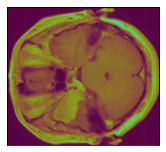

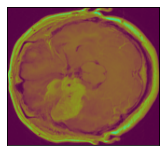

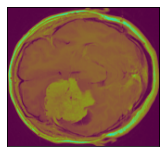

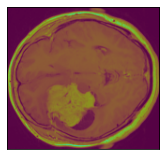

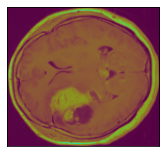

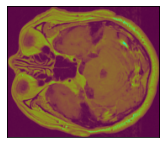

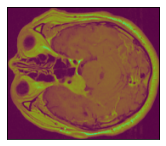

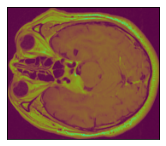

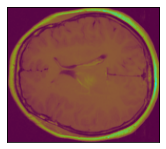

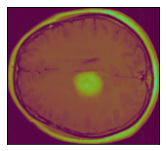

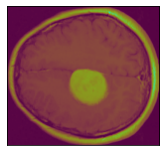

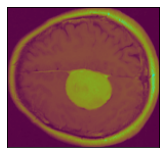

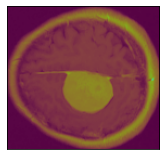

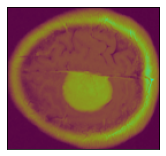

In [29]:
x = []

for a in range(1, 15):
  toCrop = cv2.imread('/content/images/' + str(a) + '.png')
  croppedImage = crop_brain_contour(toCrop, a, plot=True)
  resized_image = cv2.resize(croppedImage, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
  normalized_image = resized_image / 255
  x.append(normalized_image)




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x = np.array(x)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
print(x.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4, 512, 512, 3)
(2, 512, 512, 3)
(2,)
(2, 512, 512, 3)
(2,)


In [ ]:
print(x_train)

In [ ]:
print(y_train)

In [ ]:
def build_model(input_shape):
    """
    Arugments:
        input_shape: A tuple representing the shape of the input of the model. shape=(image_width, image_height, #_channels)
    Returns:
        model: A Model object.
    """
    # Define the input placeholder as a tensor with shape input_shape. 
    X_input = Input(input_shape) # shape=(?, 240, 240, 3)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((2, 2))(X_input) # shape=(?, 244, 244, 3)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X) # shape=(?, 238, 238, 32)
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool0')(X) # shape=(?, 59, 59, 32) 
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool1')(X) # shape=(?, 14, 14, 32)
    
    # FLATTEN X 
    X = Flatten()(X) # shape=(?, 6272)
    # FULLYCONNECTED
    X = Dense(1, activation='sigmoid', name='fc')(X) # shape=(?, 1)
    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='BrainDetectionModel')
    
    return model

In [ ]:
IMG_SHAPE = (512, 512, 3)


In [ ]:
model = build_model(IMG_SHAPE)

In [ ]:
model.summary()

Model: "BrainDetectionModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 516, 516, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 510, 510, 32)      4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 510, 510, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 510, 510, 32)      0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 127, 127, 32)      0         
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 31, 31, 32)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# tensorboard
log_file_name = f'brain_tumor_detection_cnn_{int(time.time())}'
tensorboard = TensorBoard(log_dir=f'logs/{log_file_name}')

In [ ]:
# checkpoint
# unique file name that will include the epoch and the validation (development) accuracy
filepath="cnn-parameters-improvement-{epoch:02d}-{val_acc:.2f}"
# save the model with the best validation (development) accuracy till now
checkpoint = ModelCheckpoint("models/{}.model".format(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max'))

In [ ]:
model.fit(x=x_train, y=y_train, epochs=3)

Epoch 1/3
1/1 [==============================] - 1s 818ms/step - loss: 4.0371e-10 - accuracy: 1.0000
Epoch 2/3
1/1 [==============================] - 1s 824ms/step - loss: 5.3390e-16 - accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 1s 816ms/step - loss: 1.7174e-20 - accuracy: 1.0000
